## Total protein analysis

In this notebook, we aim to observe if the total protein behaves or not as a good normalization variable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('total_protein_compiled.csv', sep='\t', header=0)

# Total Protein vs Collected Volume, per study

The three studies considered here come from samples of the "240 Cohort" (1:1 dilution), and samples from the "120 Cohort" (adding 0.5mL and 2mL as two separate subsets).

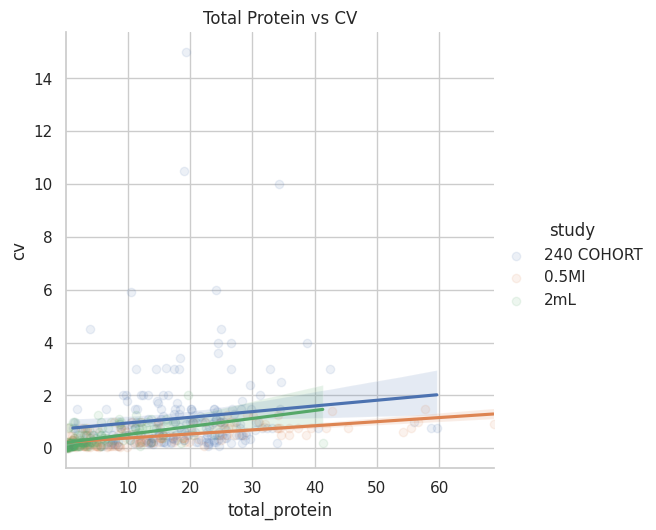

In [3]:
# plot "cv" versus "total_protein", one line per "study", small transparent dots
sns.set(style="whitegrid")
sns.lmplot(x='total_protein', y='cv', data=df, hue='study', scatter_kws={'alpha':0.1})
plt.title('Total Protein vs CV')
plt.show()

The "2mL" subset appears with a more pronounced slope, but let's plot the same using log scale for better clarity.

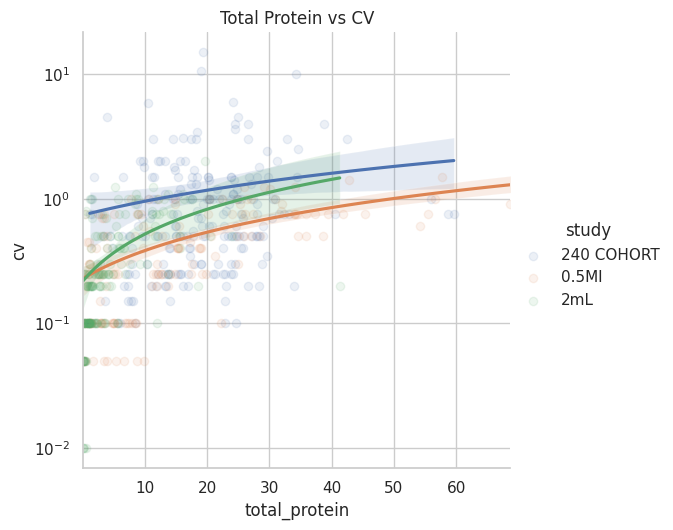

In [4]:
# plot "cv" versus "total_protein", one line per "study", small transparent dots
sns.set(style="whitegrid")
sns.lmplot(x='total_protein', y='cv', data=df, hue='study', scatter_kws={'alpha':0.1})
plt.title('Total Protein vs CV')
plt.yscale('log')
plt.xscale('log')
plt.show()

In this plot we can observe the following:

- When adding 2mL, we can extract more total protein in samples with smaller collected volume.
- When dilution is made using a fixed added volume, total protein appears to be not fully extracted for smaller collected volumes, and once the collected volume grow the  total protein tendency appears to stabilize in a linear growth.
- The latter does not happend with 1:1 dilution.

## AUCs of total protein

Here we compute the AUC for total protein as a classifier of pathology for the different subsets. Values close to 0.5 (random) are a **precondition** for total protein being a good normalizator variable. The latter is **necessary** but not **sufficient**: variables with AUC=0.5 could be bad normalizers.

In [8]:
df['pathology'] = df['pathology'].replace('Benign', 0)
df['pathology'] = df['pathology'].replace('Endometrial cancer', 1)

# remove nans
df = df.dropna(subset=['total_protein'])
df = df.dropna(subset=['pathology'])
# drop "Otros" from pathology
df = df[df['pathology'] != 'Otros']
# remove Hiperplasia atípica endometrial from pathology
df = df[df['pathology'] != 'Hiperplasia atípica endometrial']

# make int columns for pathology and study
df['pathology'] = df['pathology'].astype(int)

# Compute the AUC for each study with respect to "pathology"
from sklearn.metrics import roc_auc_score
aucs = []
for study in df['study'].unique():
    sub_df = df[df['study'] == study]
    auc = roc_auc_score(sub_df['pathology'], sub_df['total_protein'])
    aucs.append({study:auc})
aucs



[{'240 COHORT': 0.6203525641025642},
 {'0.5Ml': 0.6849765258215962},
 {'2mL': 0.7638709677419354}]

As can be seen, the 2mL subset has a bigger AUC than the 0.5mL subset, this indicates that a bigger added volume makes the total protein a better classifier and a worst normalizer.